In [448]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [449]:
df = pd.read_csv('data/clean_data.csv')

In [450]:
df.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [451]:
df.shape

(2620, 8)

In [452]:
df.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


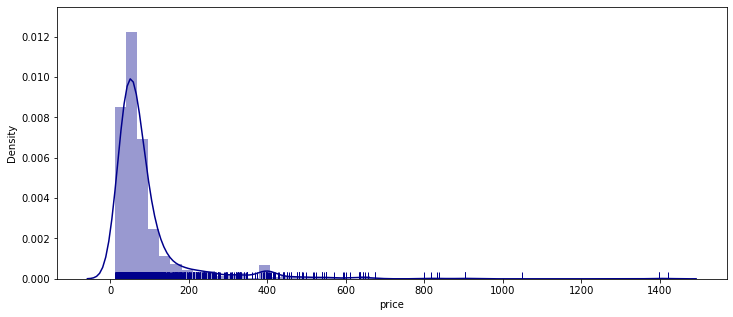

In [453]:
plt.figure(figsize=(12, 5))
sns.distplot(a=df['price'], kde=True, hist=True, rug=True, color='darkblue')
plt.show()

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [455]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,2620.0,93.834683,113.609349,12.83,42.0,61.735,90.00,1422.0
area,2620.0,1282.925191,692.566319,300.00,877.0,1091.500,1471.25,6700.0
bhk,2620.0,2.443893,0.811984,1.00,2.0,2.000,3.00,8.0
bathroom,1403.0,2.359230,0.844951,1.00,2.0,2.000,3.00,7.0
age,1729.0,1.355119,2.102682,0.00,0.0,0.000,3.00,32.0


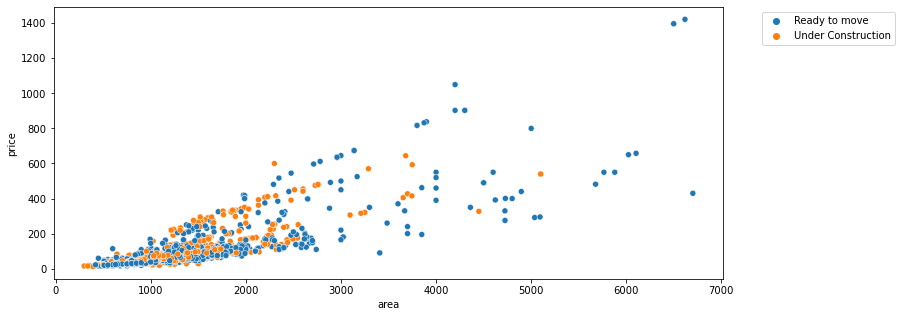

In [456]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='area', y='price', data=df, hue='status')
plt.legend(bbox_to_anchor=(1.05, 1))

<AxesSubplot:xlabel='area', ylabel='price'>

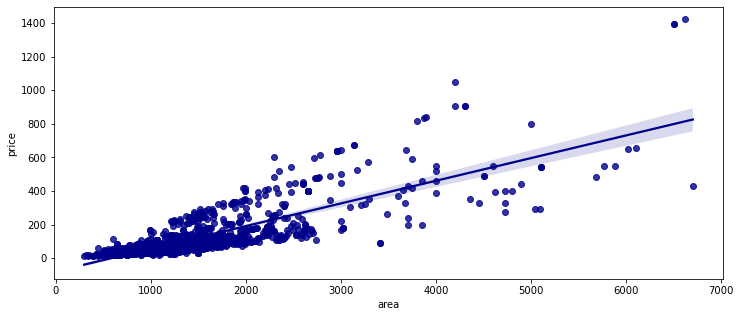

In [457]:
plt.figure(figsize=(12, 5))
sns.regplot(x='area', y='price', data=df, color='darkblue')
#plt.legend(bbox_to_anchor=(1.05, 1))

In [458]:
area_outlier_index = df[(df['area'] > 6400) & (df['price'] > 400)].index

In [459]:
area_outlier_index

Int64Index([1466, 1473, 1475, 2125], dtype='int64')

In [460]:
df.drop(index=area_outlier_index, axis=0, inplace=True)

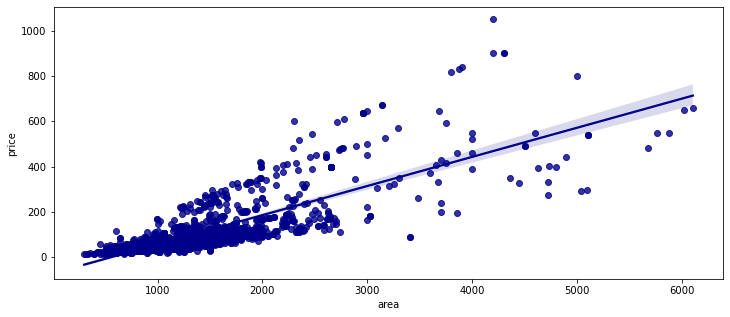

In [461]:
plt.figure(figsize=(12, 5))
sns.regplot(x='area', y='price', data=df, color='darkblue')
plt.show()

In [462]:
df.shape

(2616, 8)

In [463]:
df.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1214
age          890
location       0
builder        0
dtype: int64

In [464]:
df.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


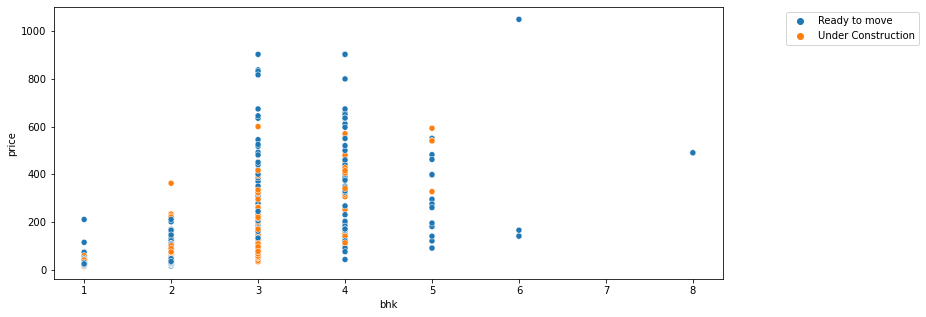

In [465]:
# let's check the relation between BHK and price

plt.figure(figsize=(12, 5))
sns.scatterplot(x='bhk', y='price', data=df, hue='status')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


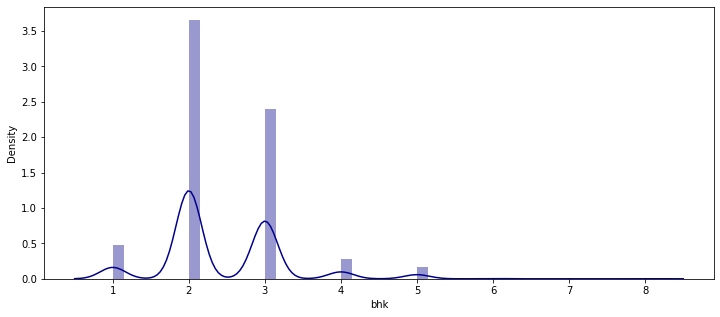

In [466]:
plt.figure(figsize=(12, 5))
sns.distplot(a=df['bhk'], kde=True, hist=True, color='darkblue')
plt.show()

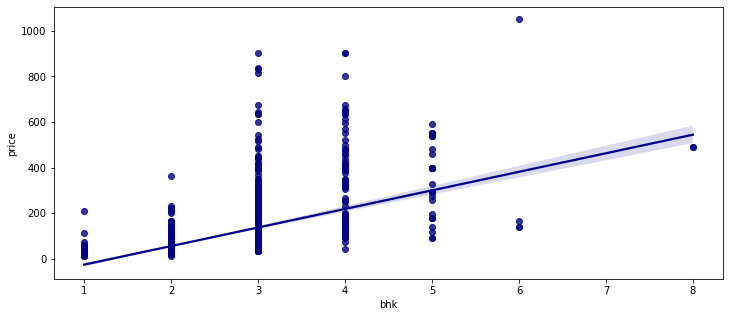

In [467]:
plt.figure(figsize=(12, 5))
sns.regplot(x='bhk', y='price', data=df, color='darkblue')
plt.show()

In [468]:
df.corr()['price']

price       1.000000
area        0.814750
bhk         0.628955
bathroom    0.686412
age         0.011789
Name: price, dtype: float64

In [469]:
# removing outliers

df.drop(index=df[(df['bhk'] >= 3) & (df['price'] >= 800)].index, axis=0, inplace=True)
df.drop(index=df[(df['bhk'] >= 6) & (df['price'] >= 100)].index, axis=0, inplace=True)
df.drop(index=df[(df['bhk'] == 3) & (df['price'] >= 550)].index, axis=0, inplace=True)
df.drop(index=df[(df['bhk'] == 4) & (df['price'] >= 600)].index, axis=0, inplace=True)

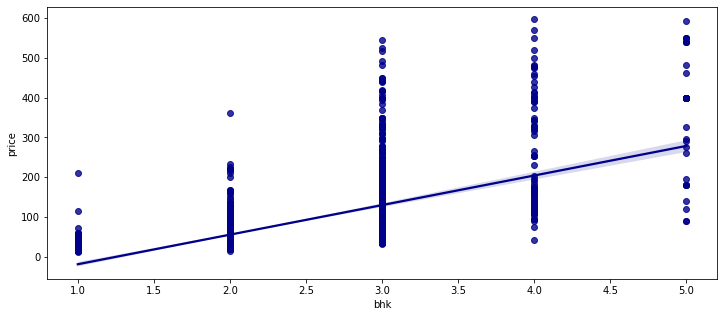

In [470]:
plt.figure(figsize=(12, 5))
sns.regplot(x='bhk', y='price', data=df, color='darkblue')
plt.show()

In [471]:
df.shape

(2590, 8)

In [472]:
df.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1197
age          880
location       0
builder        0
dtype: int64

<AxesSubplot:xlabel='bathroom', ylabel='price'>

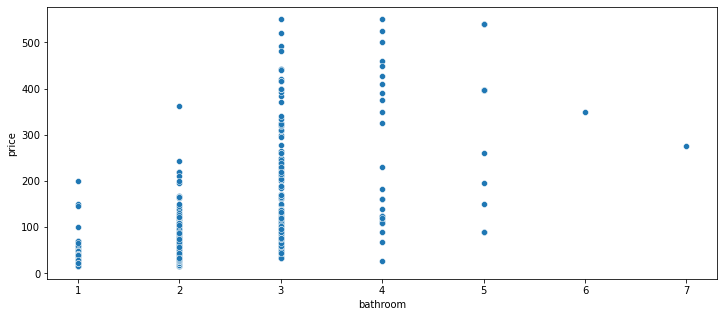

In [473]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='bathroom', y='price', data=df)

In [474]:
# BHK and bathroom features are having the same affect on price. 
# typically correlation at 0.62 and 0.68, so we are going to drop feature bathroom.

df.drop('bathroom', axis=1, inplace=True)

In [475]:
df.head()

,price,area,status,bhk,age,location,builder
0,37.49,872,Ready to move,2,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [476]:
df.isnull().sum()

price         0
area          0
status        0
bhk           0
age         880
location      0
builder       0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='price'>

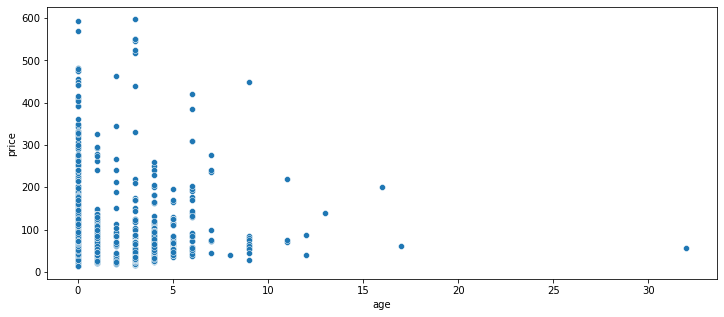

In [477]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='age', y='price', data=df)

In [478]:
# the feature age has low corelation with price, ie 0.011
# so we are going to drop that as well. 

df.drop('age', axis=1, inplace=True)

In [479]:
df.head()

,price,area,status,bhk,location,builder
0,37.49,872,Ready to move,2,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,Pallavaram,Radiance Realty Developers India Ltd


In [480]:
df.isnull().sum()

price       0
area        0
status      0
bhk         0
location    0
builder     0
dtype: int64

In [481]:
df['status']

0            Ready to move
1       Under Construction
2       Under Construction
3            Ready to move
4       Under Construction
               ...        
2615         Ready to move
2616         Ready to move
2617         Ready to move
2618         Ready to move
2619         Ready to move
Name: status, Length: 2590, dtype: object

In [482]:
df['status'].unique()

array(['Ready to move', 'Under Construction'], dtype=object)

<AxesSubplot:xlabel='status', ylabel='count'>

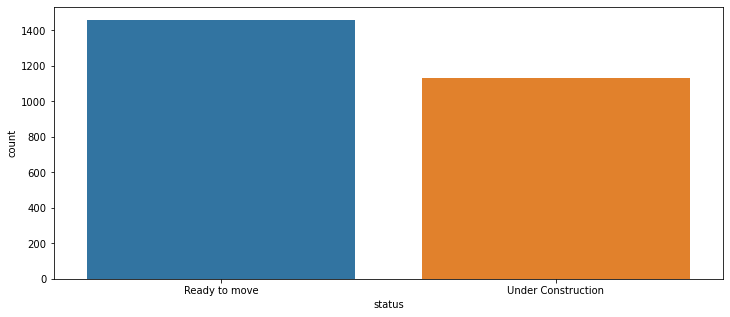

In [483]:
plt.figure(figsize=(12, 5))
sns.countplot(x='status', data=df)

<AxesSubplot:xlabel='status', ylabel='price'>

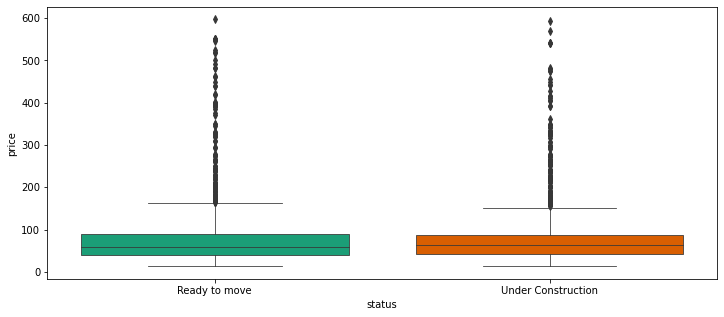

In [484]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='status', y='price', data=df, palette='Dark2', saturation=1, linewidth=0.8)

<AxesSubplot:xlabel='status', ylabel='price'>

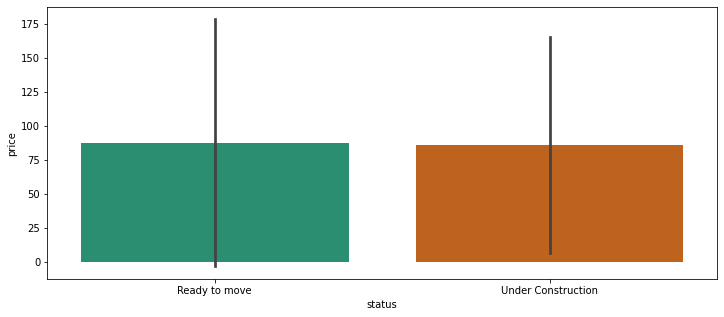

In [485]:
plt.figure(figsize=(12, 5))
sns.barplot(x='status', y='price', data=df, palette='Dark2', ci='sd')

In [486]:
dummy_status = pd.get_dummies(df['status'])

In [487]:
df = pd.concat([df, dummy_status], axis=1)

In [488]:
df.head()

,price,area,status,bhk,location,builder,Ready to move,Under Construction
0,37.49,872,Ready to move,2,Sembakkam,MP Developers,1,0
1,93.54,1346,Under Construction,3,Selaiyur,DAC Promoters,0,1
2,151.00,2225,Under Construction,3,Mogappair,Casagrand Builder Private Limited,0,1
3,49.00,1028,Ready to move,2,Ambattur,Dugar Housing Builders,1,0
4,42.28,588,Under Construction,2,Pallavaram,Radiance Realty Developers India Ltd,0,1


In [489]:
df['location'].unique()

array(['Sembakkam', 'Selaiyur', 'Mogappair', 'Ambattur', 'Pallavaram',
       'Virugambakkam', 'Thirumazhisai', 'Moolakadai', 'Ottiyambakkam',
       'Perungalathur', 'Gerugambakkam', 'Anna Nagar', 'Gopalapuram',
       'Pammal', 'Porur', 'Navallur', 'Sholinganallur', 'Vanagaram',
       'T Nagar', 'Guindy', 'Madipakkam', 'Perumbakkam', 'Velachery',
       'Medavakkam', 'Gowrivakkam', 'Chromepet', 'Thalambur', 'Thandalam',
       'Ayanambakkam', 'Kanathur Reddikuppam', 'Adyar', 'Kolapakkam',
       'Thaiyur', 'Thoraipakkam OMR', 'Poonamallee', 'Padur',
       'East Tambaram', 'Tiruvottiyur', 'Iyappanthangal', 'Padappai',
       'Mugalivakkam', 'Kelambakkam', 'Thirumullaivoyal', 'Madhavaram',
       'Kundrathur', 'Vengaivasal', 'Siruseri', 'Manapakkam',
       'Karapakkam', 'Sithalapakkam', 'Madambakkam', 'Perungudi',
       'Vadapalani', 'Alwarpet', 'Thiruvidandhai', 'Kotturpuram',
       'Velappanchavadi', 'Kilpauk', 'Besant Nagar', 'Vellakkal', 'Avadi',
       'Kolathur', 'Thiruvanmi

In [490]:
df['location'].value_counts()

Veppampattu         149
Pammal              139
Medavakkam          111
Sholinganallur       97
Perungudi            88
                   ... 
Manali                1
Sevvapet              1
Gokulapuram           1
Iyyapa Nagar          1
Kil Ayanambakkam      1
Name: location, Length: 178, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

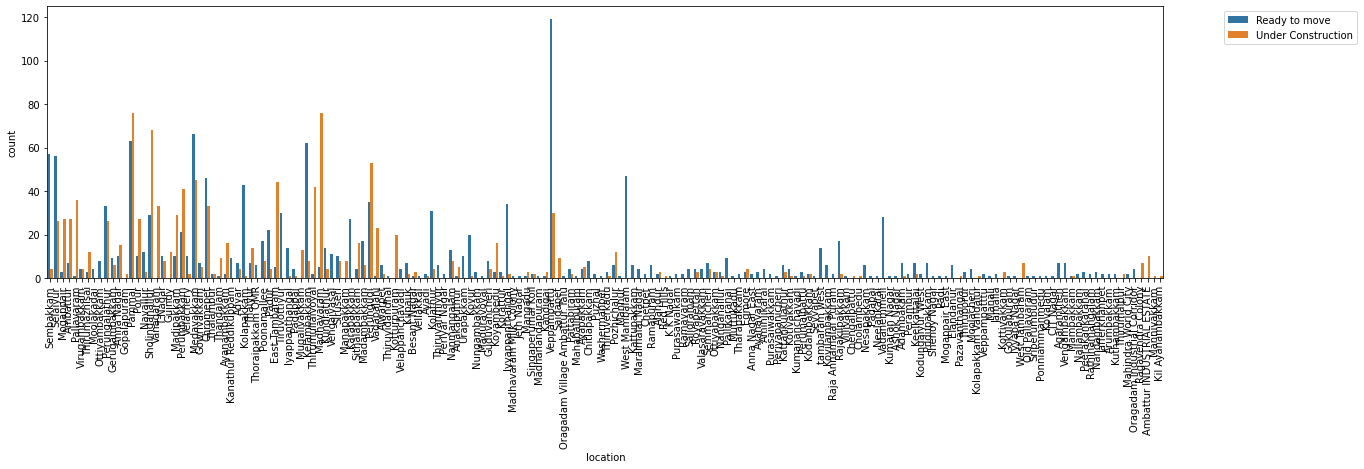

In [491]:
plt.figure(figsize=(20, 5))
sns.countplot(x='location', data=df, hue='status')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)

In [492]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [493]:
df['builder'].unique()

array(['MP Developers', 'DAC Promoters',
       'Casagrand Builder Private Limited', 'Dugar Housing Builders',
       'Radiance Realty Developers India Ltd', 'Traventure Homes Pvt Ltd',
       'Urbanrise', 'Navin Housing Properties P LTD',
       'Jones foundation private limited', 'Isha Homes',
       'Kochar Homes Pvt Ltd', 'Pushkar Properties Pvt Ltd',
       'Asset Tree Homes', 'Urban Tree Infrastructures', 'Olympia Group',
       'Vijay Raja Homes Private Limited', 'Kamalam Builder Pvt Ltd',
       'Appaswamy Real Estate', 'VNR Homes', 'PS Srijan Developers',
       'Lifestyle Housing', 'Puravankara Limited', 'Jones Foundations',
       'Plaza Group', 'Urbando Housing LLP', 'EK Realtors',
       'The Nest Builder', 'Doshi Housing', 'Grandstyle constructions',
       'vinoth builders', 'GTK Foundations', 'Baashyaam Group', 'chris',
       'Krishna Constructions', 'AKS Housing Dedvelopment Pvt Ltd',
       'Mayances Construction and Engineering Services',
       'Ramaniyam Real Esta

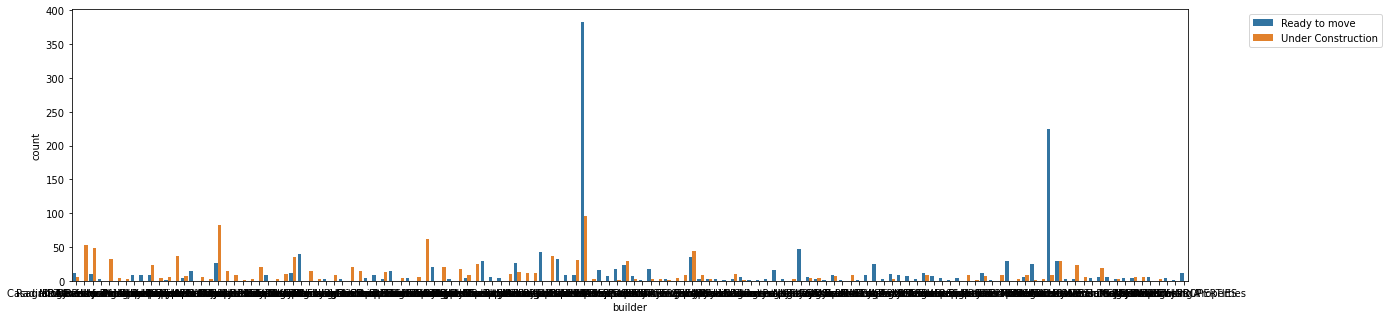

In [494]:
plt.figure(figsize=(20, 5))
sns.countplot(x='builder', data=df, hue='status')
plt.legend(bbox_to_anchor=(1.05, 1))

<AxesSubplot:>

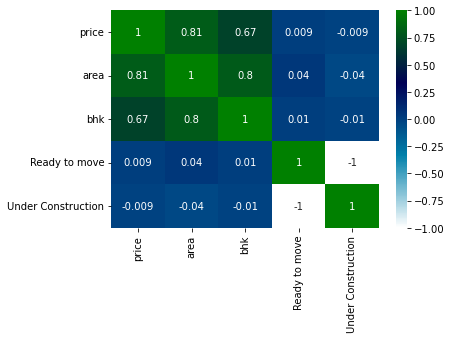

In [495]:
sns.heatmap(data=df.corr(), annot=True, cmap='ocean_r')

In [496]:
features = ['area', 'bhk', 'Ready to move', 'Under Construction']

In [497]:
X = df[features].values

In [498]:
X

array([[ 872,    2,    1,    0],
       [1346,    3,    0,    1],
       [2225,    3,    0,    1],
       ...,
       [ 800,    2,    1,    0],
       [ 850,    2,    1,    0],
       [ 900,    2,    1,    0]], dtype=int64)

In [499]:
y = df['price'].values

In [500]:
from sklearn.model_selection import train_test_split

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=90)

In [502]:
from sklearn.preprocessing import MinMaxScaler

In [503]:
scaler = MinMaxScaler()

In [504]:
scaler.fit(X_train)

MinMaxScaler()

In [505]:
X_train = scaler.transform(X_train)

In [506]:
X_test = scaler.transform(X_test)

In [507]:
from sklearn.linear_model import LinearRegression

In [508]:
lr_model = LinearRegression(normalize=True)

In [509]:
lr_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [510]:
pred = lr_model.predict(X_test)

In [511]:
pred

array([ 35.124696  ,  64.09507824,  37.90258486,  89.72468162,
        35.4536932 ,  62.07208078,  98.5619863 ,  43.01331527,
        96.75193594, 104.94082277, 152.65054987,  57.28077102,
        55.47072066,  62.27545134, 137.42483217,  88.96979022,
        55.47072066, 153.92823248,  43.54568303,  43.22626237])

In [512]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [513]:
mean_absolute_error(y_test, pred)

19.294977075445985

In [514]:
mean_squared_error(y_test, pred)

657.4070704751532

In [515]:
np.sqrt(mean_squared_error(y_test, pred))

25.63995067224493

In [516]:
r2_score(y_test, pred)

0.541288302514675

In [517]:
q = [2225, 3, 0, 1]

# ['area', 'bhk', 'Ready to move', 'Under Construction']

In [518]:
p = lr_model.predict([q])

In [519]:
p

array([1321748.26170875])

In [520]:
df.head()

,price,area,status,bhk,location,builder,Ready to move,Under Construction
0,37.49,872,Ready to move,2,Sembakkam,MP Developers,1,0
1,93.54,1346,Under Construction,3,Selaiyur,DAC Promoters,0,1
2,151.00,2225,Under Construction,3,Mogappair,Casagrand Builder Private Limited,0,1
3,49.00,1028,Ready to move,2,Ambattur,Dugar Housing Builders,1,0
4,42.28,588,Under Construction,2,Pallavaram,Radiance Realty Developers India Ltd,0,1


In [521]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [522]:
model = Sequential()

model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [523]:
model.fit(X_train, y_train, epochs=200, verbose='auto')

Epoch 1/200
81/81 [==============================] - 1s 1ms/step - loss: 14956.4922
Epoch 2/200
81/81 [==============================] - 0s 1ms/step - loss: 14915.4570
Epoch 3/200
81/81 [==============================] - 0s 1ms/step - loss: 14857.6143
Epoch 4/200
81/81 [==============================] - 0s 1ms/step - loss: 14775.3135
Epoch 5/200
81/81 [==============================] - 0s 1ms/step - loss: 14653.4844
Epoch 6/200
81/81 [==============================] - 0s 1ms/step - loss: 14467.8213
Epoch 7/200
81/81 [==============================] - 0s 1ms/step - loss: 14205.1855
Epoch 8/200
81/81 [==============================] - 0s 1ms/step - loss: 13845.5752
Epoch 9/200
81/81 [==============================] - 0s 2ms/step - loss: 13347.0566
Epoch 10/200
81/81 [==============================] - 0s 2ms/step - loss: 12676.1914
Epoch 11/200
81/81 [==============================] - 0s 2ms/step - loss: 11817.1230
Epoch 12/200
81/81 [==============================] - 0s 2ms/step - loss: 

81/81 [==============================] - 0s 1ms/step - loss: 2600.3425
Epoch 99/200
81/81 [==============================] - 0s 1ms/step - loss: 2597.8486
Epoch 100/200
81/81 [==============================] - 0s 1ms/step - loss: 2595.6099
Epoch 101/200
81/81 [==============================] - 0s 2ms/step - loss: 2592.9470
Epoch 102/200
81/81 [==============================] - 0s 1ms/step - loss: 2592.5510
Epoch 103/200
81/81 [==============================] - 0s 1ms/step - loss: 2588.0991
Epoch 104/200
81/81 [==============================] - 0s 1ms/step - loss: 2586.4917
Epoch 105/200
81/81 [==============================] - 0s 1ms/step - loss: 2588.0325
Epoch 106/200
81/81 [==============================] - 0s 1ms/step - loss: 2586.1812
Epoch 107/200
81/81 [==============================] - 0s 2ms/step - loss: 2584.0952
Epoch 108/200
81/81 [==============================] - 0s 1ms/step - loss: 2582.2524
Epoch 109/200
81/81 [==============================] - 0s 1ms/step - loss: 2580.

81/81 [==============================] - 0s 2ms/step - loss: 2492.3433
Epoch 195/200
81/81 [==============================] - 0s 2ms/step - loss: 2489.2957
Epoch 196/200
81/81 [==============================] - 0s 1ms/step - loss: 2493.2239
Epoch 197/200
81/81 [==============================] - 0s 1ms/step - loss: 2491.5637
Epoch 198/200
81/81 [==============================] - 0s 1ms/step - loss: 2488.4927
Epoch 199/200
81/81 [==============================] - 0s 2ms/step - loss: 2490.7175
Epoch 200/200
81/81 [==============================] - 0s 2ms/step - loss: 2488.4102


In [524]:
deep_model_pred = model.predict(X_test)

In [525]:
deep_model_pred

array([[ 39.461018],
       [ 56.405136],
       [ 42.18936 ],
       [ 95.76236 ],
       [ 40.860245],
       [ 55.307175],
       [101.84821 ],
       [ 44.963173],
       [100.2825  ],
       [101.076965],
       [148.63496 ],
       [ 52.706722],
       [ 51.72434 ],
       [ 54.120407],
       [135.46468 ],
       [ 92.453804],
       [ 51.72434 ],
       [149.74017 ],
       [ 45.252117],
       [ 45.07875 ]], dtype=float32)

In [526]:
df[:]

,price,area,status,bhk,location,builder,Ready to move,Under Construction
0,37.49,872,Ready to move,2,Sembakkam,MP Developers,1,0
1,93.54,1346,Under Construction,3,Selaiyur,DAC Promoters,0,1
2,151.00,2225,Under Construction,3,Mogappair,Casagrand Builder Private Limited,0,1
3,49.00,1028,Ready to move,2,Ambattur,Dugar Housing Builders,1,0
4,42.28,588,Under Construction,2,Pallavaram,Radiance Realty Developers India Ltd,0,1
...,...,...,...,...,...,...,...,...
2615,27.50,750,Ready to move,2,Veppampattu,Velan Housing Properties,1,0
2616,27.50,750,Ready to move,2,Veppampattu,Velan Housing Properties,1,0
2617,30.00,800,Ready to move,2,Veppampattu,Velan Housing Properties,1,0
2618,31.50,850,Ready to move,2,Veppampattu,Velan Housing Properties,1,0


In [527]:
q = [750, 2, 1, 0]
q = scaler.transform([q])

In [528]:
r = model.predict(q)

In [529]:
r

array([[37.853134]], dtype=float32)

In [530]:
####### linear model and sequencial model evaluation #######

a = pd.DataFrame(pred, columns=['Linear_model_predictions'])
b = pd.DataFrame(y_test, columns=['True_outcomes'])

df1 = pd.concat([a, b], axis=1)



In [531]:
df1

,Linear_model_predictions,True_outcomes
0,35.124696,26.75
1,64.095078,51.24
2,37.902585,44.00
3,89.724682,67.10
4,35.453693,49.44
5,62.072081,73.93
6,98.561986,63.83
7,43.013315,41.12
8,96.751936,55.00
9,104.940823,78.40


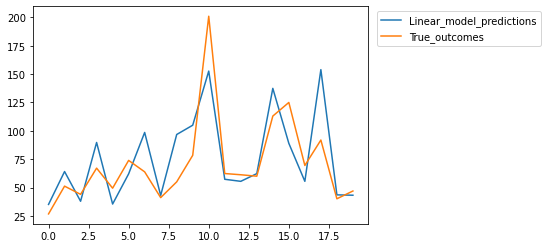

In [532]:
df1.plot()
plt.legend(bbox_to_anchor=(1.53, 1))

In [533]:
c = pd.DataFrame(deep_model_pred, columns=['Seq_model_predictions'])

In [534]:
df2 = pd.concat([b, c], axis=1)

In [535]:
df2

,True_outcomes,Seq_model_predictions
0,26.75,39.461018
1,51.24,56.405136
2,44.00,42.189362
3,67.10,95.762360
4,49.44,40.860245
5,73.93,55.307175
6,63.83,101.848213
7,41.12,44.963173
8,55.00,100.282501
9,78.40,101.076965


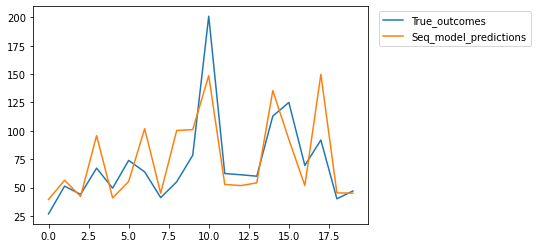

In [536]:
df2.plot()
plt.legend(bbox_to_anchor=(1.5, 1))